 ### <a style ="color:red" > Mariem GMach  3Dni Groupe 2  </a>

## <center style="color:#cd3635"> Compte rendu TP3  </center>
<img src="images.jpg" width="240" height="240" align="center"/>

# <a style ="color=red" > Exercice1 </a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
School  = pd.read_csv('grav.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("Data shape : ", School .shape)
# Affichage des 10 premières lignes
School .head()

Data shape :  (7, 2)


,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


In [3]:
#selection de la première colonne de notre dataset (la taille de la population)
X = School .iloc[0:len(School ),0]
#selection de deuxième colonnes de notre dataset (le profit effectué)
Y = School .iloc[0:len(School ),1] 

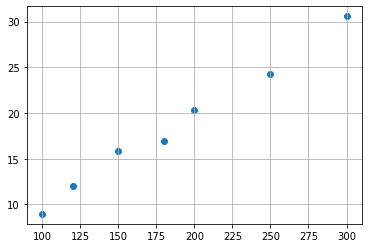

In [4]:
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

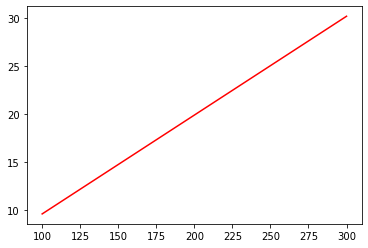

In [5]:
from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
def predict(x):
   return slope * x + intercept
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
fitLine = predict(X)
plt.plot(X, fitLine, c='r')

In [6]:
slope

0.10280912511759172

In [7]:
intercept

-0.6801232361241745

In [8]:
r_value

0.9947324344135698

In [9]:
p_value

3.857021649169523e-06

In [10]:
std_err

0.004737919558962453

# <a style ="color=red" > Exercice2 </a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [12]:
Student  = pd.read_csv('test_scores.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("Data's shape : ", Student .shape)
# Affichage des 10 premières lignes
Student.head()

Data's shape :  (2133, 11)


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0


In [13]:
# Récupérer l'ensemble des valeurs de la variable cible
Y = Student["posttest"]
# Récupérer les variables prédictives (on en a 2)
X = Student["pretest"]

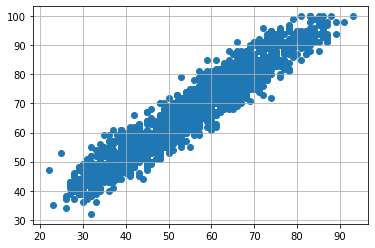

In [14]:
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()


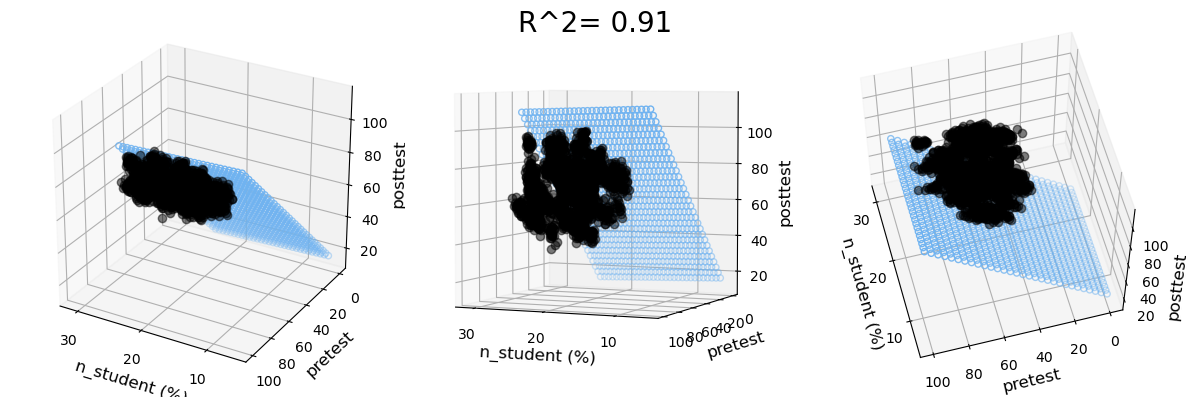

In [15]:
X=Student[['n_student','pretest']].values.reshape(-1,2)
Y=Student['posttest']


x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T



ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)


r2 = model.score(X, Y)


plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

axe1 = fig.add_subplot(131, projection='3d')
axe2 = fig.add_subplot(132, projection='3d')
axe3 = fig.add_subplot(133, projection='3d')

axes=[axe1,axe2,axe3]

for axe in axes:
        axe.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
        axe.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
        axe.set_xlabel('n_student (%)', fontsize=12)
        axe.set_ylabel('pretest', fontsize=12)
        axe.set_zlabel('posttest', fontsize=12)
        axe.locator_params(nbins=4, axis='x')
        axe.locator_params(nbins=5, axis='x')
        



axe1.view_init(elev=28,azim=120)
axe2.view_init(elev=4,azim=114)
axe3.view_init(elev=60,azim=165)


fig.suptitle('R^2= %.2f'%r2, fontsize=20)
fig.tight_layout()

# <a style ="color=red" > Exercice3 </a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [18]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [19]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [71]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [72]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [73]:
boston['MEDV'] = boston_dataset.target

## Data preprocessing

In [74]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Exploratory Data Analysis

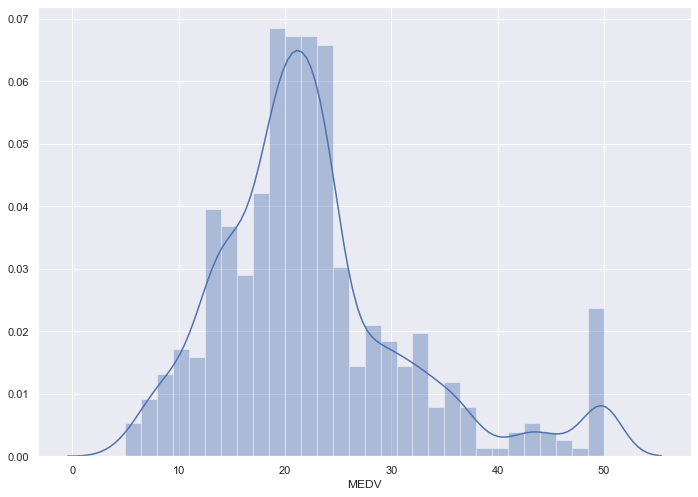

In [75]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

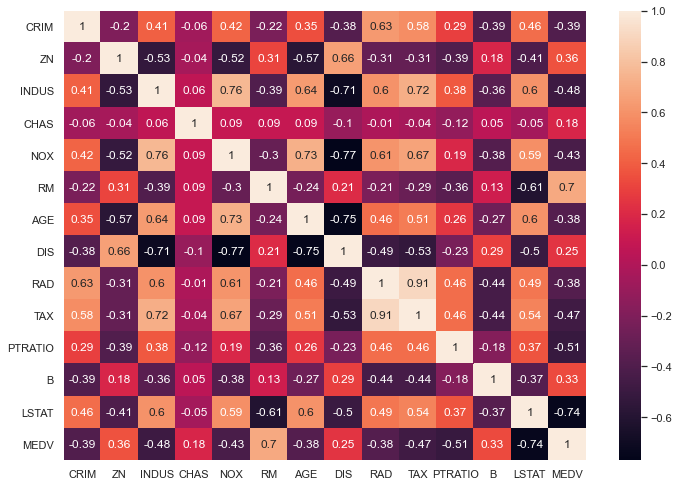

In [76]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

>The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

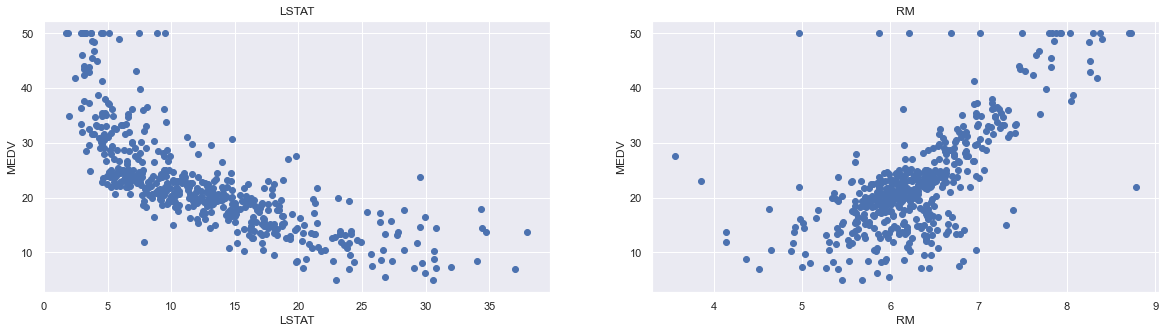

In [77]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Preparing the data for training the model 

In [85]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

## Splitting the data into training and testing sets

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


## Training and testing the model

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

## Model evaluation

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953
